# 🔍 Fase 2: Comprensión Profunda de los Datos NBA

## 📋 Objetivo
Explorar y entender el dataset de la NBA para detectar problemas, oportunidades y patrones ocultos que puedan impactar el rendimiento de nuestros modelos de machine learning.

## 🎯 Metodología
Este análisis se enfoca en:
- **Exploración sistemática** de la estructura y calidad de los datos
- **Identificación de patrones** y relaciones entre variables
- **Detección de problemas** como valores faltantes, outliers y sesgos
- **Comprensión del dominio** para interpretar correctamente los hallazgos

---

## 📊 Contenido del Análisis
1. **Carga y Exploración Inicial** - Estructura básica del dataset
2. **Análisis de Calidad de Datos** - Valores nulos, duplicados y consistencia
3. **Exploración Estadística** - Distribuciones y estadísticas descriptivas
4. **Visualizaciones Avanzadas** - Patrones y relaciones entre variables
5. **Detección de Anomalías** - Outliers, sesgos y desequilibrios
6. **Insights y Recomendaciones** - Conclusiones para el modelado


In [1]:
# 📥 Carga del Dataset
print("🔄 Cargando datasets de la NBA...")
print("=" * 50)

# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Configurar estilo de visualizaciones
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

# Cargar datasets principales
print("📊 Cargando datasets...")

# Dataset principal de partidos
games_df = pd.read_csv('../data/01_raw/game.csv')
print(f"✅ game.csv cargado: {games_df.shape}")

# Estadísticas adicionales
other_stats_df = pd.read_csv('../data/01_raw/other_stats.csv')
print(f"✅ other_stats.csv cargado: {other_stats_df.shape}")

# Información de equipos
teams_df = pd.read_csv('../data/01_raw/team.csv')
print(f"✅ team.csv cargado: {teams_df.shape}")

# Información de jugadores
players_df = pd.read_csv('../data/01_raw/player.csv')
print(f"✅ player.csv cargado: {players_df.shape}")

# Información de partidos (metadatos)
game_info_df = pd.read_csv('../data/01_raw/game_info.csv')
print(f"✅ game_info.csv cargado: {game_info_df.shape}")

print(f"\n🎯 Dataset principal seleccionado: game.csv")
print(f"📈 Dimensiones: {games_df.shape[0]:,} filas × {games_df.shape[1]} columnas")

# Mostrar primeras filas
print(f"\n👀 Primeras 3 filas del dataset:")
display(games_df.head(3))


🔄 Cargando datasets de la NBA...
📊 Cargando datasets...
✅ game.csv cargado: (65698, 55)
✅ other_stats.csv cargado: (28271, 26)
✅ team.csv cargado: (30, 7)
✅ player.csv cargado: (4831, 5)
✅ game_info.csv cargado: (58053, 4)

🎯 Dataset principal seleccionado: game.csv
📈 Dimensiones: 65,698 filas × 55 columnas

👀 Primeras 3 filas del dataset:


,season_id,team_id_home,team_abbreviation_home,team_name_home,game_id,game_date,matchup_home,wl_home,min,fgm_home,...,reb_away,ast_away,stl_away,blk_away,tov_away,pf_away,pts_away,plus_minus_away,video_available_away,season_type
0,21946,1610610035,HUS,Toronto Huskies,24600001,1946-11-01 00:00:00,HUS vs. NYK,L,0,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,68.0,2,0,Regular Season
1,21946,1610610034,BOM,St. Louis Bombers,24600003,1946-11-02 00:00:00,BOM vs. PIT,W,0,20.0,...,NaN,NaN,NaN,NaN,NaN,25.0,51.0,-5,0,Regular Season
2,21946,1610610032,PRO,Providence Steamrollers,24600002,1946-11-02 00:00:00,PRO vs. BOS,W,0,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,53.0,-6,0,Regular Season


In [2]:
# 🔎 Exploración Inicial del Dataset
print("🔍 EXPLORACIÓN INICIAL DEL DATASET")
print("=" * 50)

# 1. Información general del dataset
print("📊 INFORMACIÓN GENERAL (.info()):")
print("-" * 30)
games_df.info()

print(f"\n📈 ESTADÍSTICAS DESCRIPTIVAS (.describe()):")
print("-" * 40)
# Mostrar estadísticas para variables numéricas
numeric_cols = games_df.select_dtypes(include=[np.number]).columns
print(f"Variables numéricas encontradas: {len(numeric_cols)}")
display(games_df[numeric_cols].describe())

print(f"\n📝 VARIABLES CATEGÓRICAS:")
print("-" * 30)
categorical_cols = games_df.select_dtypes(include=['object']).columns
print(f"Variables categóricas encontradas: {len(categorical_cols)}")
for col in categorical_cols:
    unique_count = games_df[col].nunique()
    print(f"• {col}: {unique_count} valores únicos")
    if unique_count <= 10:  # Mostrar valores si son pocos
        print(f"  Valores: {list(games_df[col].unique())}")
    print()


🔍 EXPLORACIÓN INICIAL DEL DATASET
📊 INFORMACIÓN GENERAL (.info()):
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65698 entries, 0 to 65697
Data columns (total 55 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   season_id               65698 non-null  int64  
 1   team_id_home            65698 non-null  int64  
 2   team_abbreviation_home  65698 non-null  object 
 3   team_name_home          65698 non-null  object 
 4   game_id                 65698 non-null  int64  
 5   game_date               65698 non-null  object 
 6   matchup_home            65698 non-null  object 
 7   wl_home                 65696 non-null  object 
 8   min                     65698 non-null  int64  
 9   fgm_home                65685 non-null  float64
 10  fga_home                50251 non-null  float64
 11  fg_pct_home             50208 non-null  float64
 12  fg3m_home               52480 non-null  float6

,season_id,team_id_home,game_id,min,fgm_home,fga_home,fg_pct_home,fg3m_home,fg3a_home,fg3_pct_home,...,dreb_away,reb_away,ast_away,stl_away,blk_away,tov_away,pf_away,pts_away,plus_minus_away,video_available_away
count,65698.000000,6.569800e+04,6.569800e+04,65698.000000,65685.000000,50251.000000,50208.000000,52480.000000,47015.000000,46624.000000,...,46700.000000,49973.000000,49897.000000,46849.000000,47073.000000,47013.000000,62847.000000,65698.000000,65698.000000,65698.000000
mean,22949.338747,1.609926e+09,2.584747e+07,221.003486,39.672269,83.992796,0.467321,5.735099,17.741146,0.346136,...,30.238073,42.119645,22.135419,7.854148,4.681537,15.199860,23.097284,100.991567,-3.627569,0.201330
std,5000.305500,3.324313e+07,6.303760e+06,67.903521,6.770802,9.164445,0.059423,4.537337,10.545810,0.151234,...,5.588675,6.867396,5.380805,3.031766,2.500820,4.299798,5.227208,14.418755,13.091395,0.400997
min,12005.000000,4.500000e+01,1.050000e+07,0.000000,4.000000,0.000000,0.140000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,-73.000000,0.000000
25%,21981.000000,1.610613e+09,2.130053e+07,240.000000,35.000000,78.000000,0.427000,2.000000,10.000000,0.261000,...,26.000000,37.000000,18.000000,6.000000,3.000000,12.000000,20.000000,92.000000,-12.000000,0.000000
50%,21997.000000,1.610613e+09,2.630007e+07,240.000000,40.000000,84.000000,0.467000,5.000000,16.000000,0.348000,...,30.000000,42.000000,22.000000,8.000000,4.000000,15.000000,23.000000,101.000000,-4.000000,0.000000
75%,22011.000000,1.610613e+09,2.880069e+07,240.000000,44.000000,89.000000,0.506000,9.000000,24.000000,0.429750,...,34.000000,47.000000,26.000000,10.000000,6.000000,18.000000,26.000000,110.000000,5.000000,0.000000
max,42022.000000,1.610617e+09,4.980009e+07,365.000000,84.000000,240.000000,0.697000,28.000000,77.000000,1.000000,...,60.000000,90.000000,89.000000,27.000000,19.000000,40.000000,115.000000,196.000000,68.000000,1.000000



📝 VARIABLES CATEGÓRICAS:
------------------------------
Variables categóricas encontradas: 10
• team_abbreviation_home: 97 valores únicos

• team_name_home: 98 valores únicos

• game_date: 12882 valores únicos

• matchup_home: 2292 valores únicos

• wl_home: 2 valores únicos
  Valores: ['L', 'W', nan]

• team_abbreviation_away: 101 valores únicos

• team_name_away: 101 valores únicos

• matchup_away: 2292 valores únicos

• wl_away: 2 valores únicos
  Valores: ['W', 'L', nan]

• season_type: 5 valores únicos
  Valores: ['Regular Season', 'Playoffs', 'All-Star', 'All Star', 'Pre Season']



❌ ANÁLISIS DE VALORES NULOS
📊 RESUMEN DE VALORES NULOS:
• Total de columnas: 55
• Columnas con valores nulos: 36
• Total de valores nulos: 432,747

🔍 COLUMNAS CON VALORES NULOS:
--------------------------------------------------


,Valores_Nulos,Porcentaje_Nulos,Valores_No_Nulos
fg3_pct_home,19074,29.032847,46624
dreb_home,18999,28.918689,46699
dreb_away,18998,28.917166,46700
fg3_pct_away,18962,28.862370,46736
oreb_away,18936,28.822795,46762
oreb_home,18936,28.822795,46762
stl_home,18849,28.690371,46849
stl_away,18849,28.690371,46849
tov_away,18685,28.440744,47013
tov_home,18684,28.439222,47014


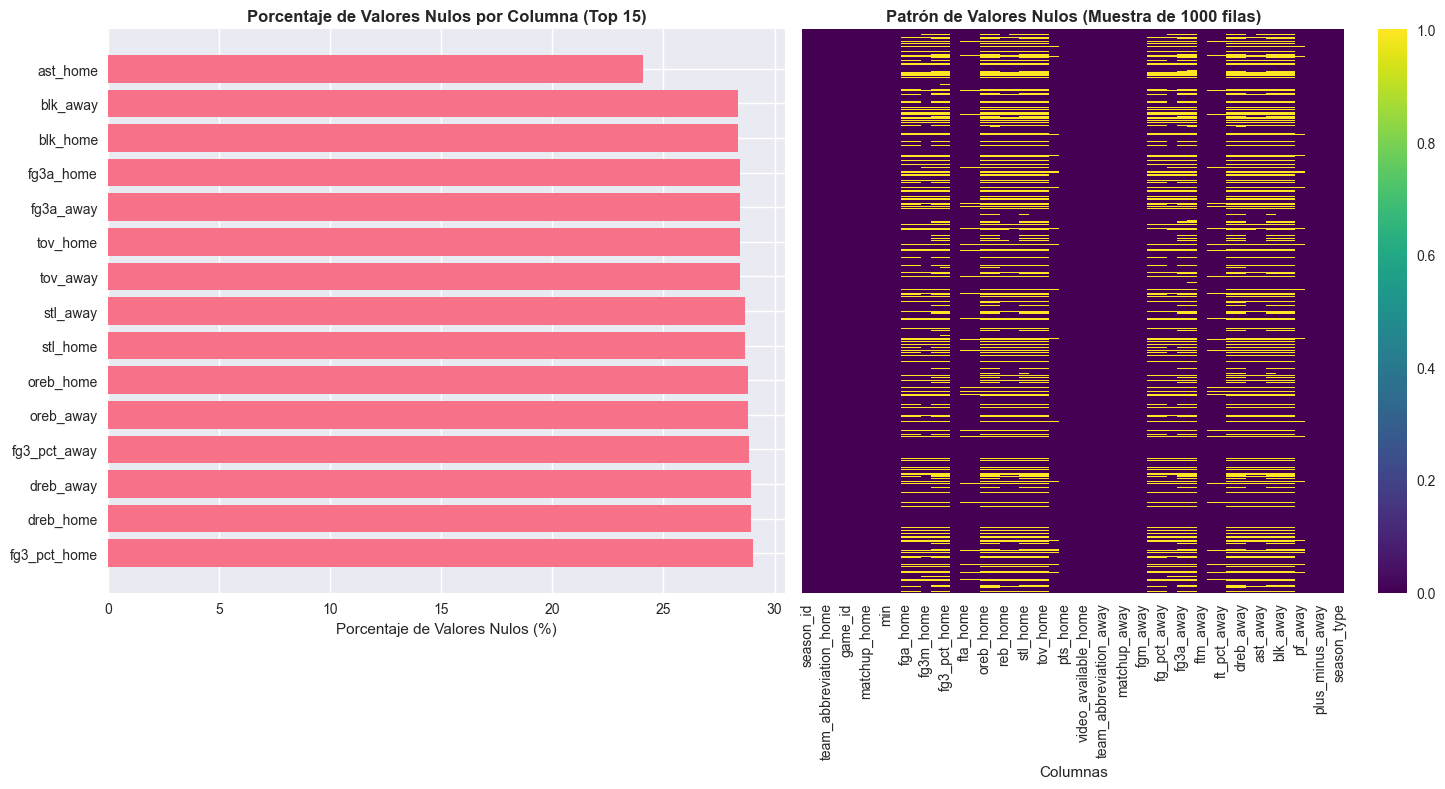


✅ Análisis de valores nulos completado


In [3]:
# 🔍 Análisis de Valores Nulos
print("❌ ANÁLISIS DE VALORES NULOS")
print("=" * 40)

# Calcular valores nulos por columna
null_analysis = pd.DataFrame({
    'Valores_Nulos': games_df.isnull().sum(),
    'Porcentaje_Nulos': (games_df.isnull().sum() / len(games_df)) * 100,
    'Valores_No_Nulos': games_df.notnull().sum()
}).sort_values('Porcentaje_Nulos', ascending=False)

# Filtrar solo columnas con valores nulos
null_columns = null_analysis[null_analysis['Valores_Nulos'] > 0]

print(f"📊 RESUMEN DE VALORES NULOS:")
print(f"• Total de columnas: {len(games_df.columns)}")
print(f"• Columnas con valores nulos: {len(null_columns)}")
print(f"• Total de valores nulos: {games_df.isnull().sum().sum():,}")

if len(null_columns) > 0:
    print(f"\n🔍 COLUMNAS CON VALORES NULOS:")
    print("-" * 50)
    display(null_columns)
    
    # Visualización de valores nulos
    plt.figure(figsize=(15, 8))
    
    # Gráfico de barras para valores nulos
    plt.subplot(1, 2, 1)
    null_columns_top = null_columns.head(15)  # Top 15 columnas con más nulos
    plt.barh(null_columns_top.index, null_columns_top['Porcentaje_Nulos'])
    plt.title('Porcentaje de Valores Nulos por Columna (Top 15)', fontweight='bold')
    plt.xlabel('Porcentaje de Valores Nulos (%)')
    plt.tight_layout()
    
    # Heatmap de valores nulos (muestra de datos)
    plt.subplot(1, 2, 2)
    # Tomar una muestra para el heatmap
    sample_data = games_df.sample(min(1000, len(games_df)))
    sns.heatmap(sample_data.isnull(), cbar=True, yticklabels=False, cmap='viridis')
    plt.title('Patrón de Valores Nulos (Muestra de 1000 filas)', fontweight='bold')
    plt.xlabel('Columnas')
    
    plt.tight_layout()
    plt.show()
else:
    print("✅ ¡Excelente! No se encontraron valores nulos en el dataset.")

print("\n✅ Análisis de valores nulos completado")


In [4]:
# 🔍 Identificación de Duplicados
print("🔄 IDENTIFICACIÓN DE DUPLICADOS")
print("=" * 40)

# 1. Verificar duplicados exactos
exact_duplicates = games_df.duplicated().sum()
print(f"📊 DUPLICADOS EXACTOS:")
print(f"• Total de filas duplicadas: {exact_duplicates:,}")
print(f"• Porcentaje de duplicados: {(exact_duplicates / len(games_df)) * 100:.2f}%")

# 2. Verificar duplicados por game_id (debería ser único)
game_id_duplicates = games_df['game_id'].duplicated().sum()
print(f"\n🎮 DUPLICADOS POR GAME_ID:")
print(f"• game_ids duplicados: {game_id_duplicates}")
if game_id_duplicates > 0:
    print("⚠️  ADVERTENCIA: Se encontraron game_ids duplicados")
    duplicate_games = games_df[games_df['game_id'].duplicated(keep=False)].sort_values('game_id')
    print("Primeros 5 game_ids duplicados:")
    display(duplicate_games[['game_id', 'game_date', 'team_name_home', 'team_name_away']].head())

# 3. Verificar duplicados por combinación de fecha y equipos
date_team_duplicates = games_df.duplicated(subset=['game_date', 'team_id_home', 'team_id_away']).sum()
print(f"\n📅 DUPLICADOS POR FECHA + EQUIPOS:")
print(f"• Combinaciones duplicadas: {date_team_duplicates}")

# 4. Análisis de consistencia en fechas
print(f"\n📊 ANÁLISIS DE CONSISTENCIA:")
print(f"• Rango de fechas: {games_df['game_date'].min()} a {games_df['game_date'].max()}")
print(f"• Total de días únicos: {games_df['game_date'].nunique()}")
print(f"• Partidos por día (promedio): {len(games_df) / games_df['game_date'].nunique():.1f}")

# 5. Verificar consistencia en temporadas
print(f"\n🏆 ANÁLISIS DE TEMPORADAS:")
print(f"• Temporadas únicas: {games_df['season_id'].nunique()}")
print(f"• Rango de temporadas: {games_df['season_id'].min()} - {games_df['season_id'].max()}")
print(f"• Partidos por temporada (promedio): {len(games_df) / games_df['season_id'].nunique():.0f}")

# 6. Verificar equipos únicos
print(f"\n🏀 ANÁLISIS DE EQUIPOS:")
print(f"• Equipos locales únicos: {games_df['team_id_home'].nunique()}")
print(f"• Equipos visitantes únicos: {games_df['team_id_away'].nunique()}")
print(f"• Total de equipos únicos: {len(set(games_df['team_id_home'].unique()) | set(games_df['team_id_away'].unique()))}")

if exact_duplicates > 0:
    print(f"\n🔍 MUESTRA DE DUPLICADOS EXACTOS:")
    duplicate_rows = games_df[games_df.duplicated(keep=False)].sort_values('game_id')
    display(duplicate_rows.head(10))

print("\n✅ Análisis de duplicados completado")


🔄 IDENTIFICACIÓN DE DUPLICADOS
📊 DUPLICADOS EXACTOS:
• Total de filas duplicadas: 0
• Porcentaje de duplicados: 0.00%

🎮 DUPLICADOS POR GAME_ID:
• game_ids duplicados: 56
⚠️  ADVERTENCIA: Se encontraron game_ids duplicados
Primeros 5 game_ids duplicados:


,game_id,game_date,team_name_home,team_name_away
38492,30100001,2002-02-10 00:00:00,East NBA All Stars East,West NBA All Stars West
38491,30100001,2002-02-10 00:00:00,East NBA All Stars East,West NBA All Stars West
39771,30200001,2003-02-09 00:00:00,East NBA All Stars East,West NBA All Stars West
39770,30200001,2003-02-09 00:00:00,East NBA All Stars East,West NBA All Stars West
41043,30300001,2004-02-15 00:00:00,West NBA All Stars West,East NBA All Stars East



📅 DUPLICADOS POR FECHA + EQUIPOS:
• Combinaciones duplicadas: 56

📊 ANÁLISIS DE CONSISTENCIA:
• Rango de fechas: 1946-11-01 00:00:00 a 2023-06-12 00:00:00
• Total de días únicos: 12882
• Partidos por día (promedio): 5.1

🏆 ANÁLISIS DE TEMPORADAS:
• Temporadas únicas: 225
• Rango de temporadas: 12005 - 42022
• Partidos por temporada (promedio): 292

🏀 ANÁLISIS DE EQUIPOS:
• Equipos locales únicos: 63
• Equipos visitantes únicos: 72
• Total de equipos únicos: 82

✅ Análisis de duplicados completado


📊 CREANDO VISUALIZACIONES AVANZADAS
🎯 Variables seleccionadas para visualización: 16

📈 1. HISTOGRAMAS - Distribuciones de Variables Clave


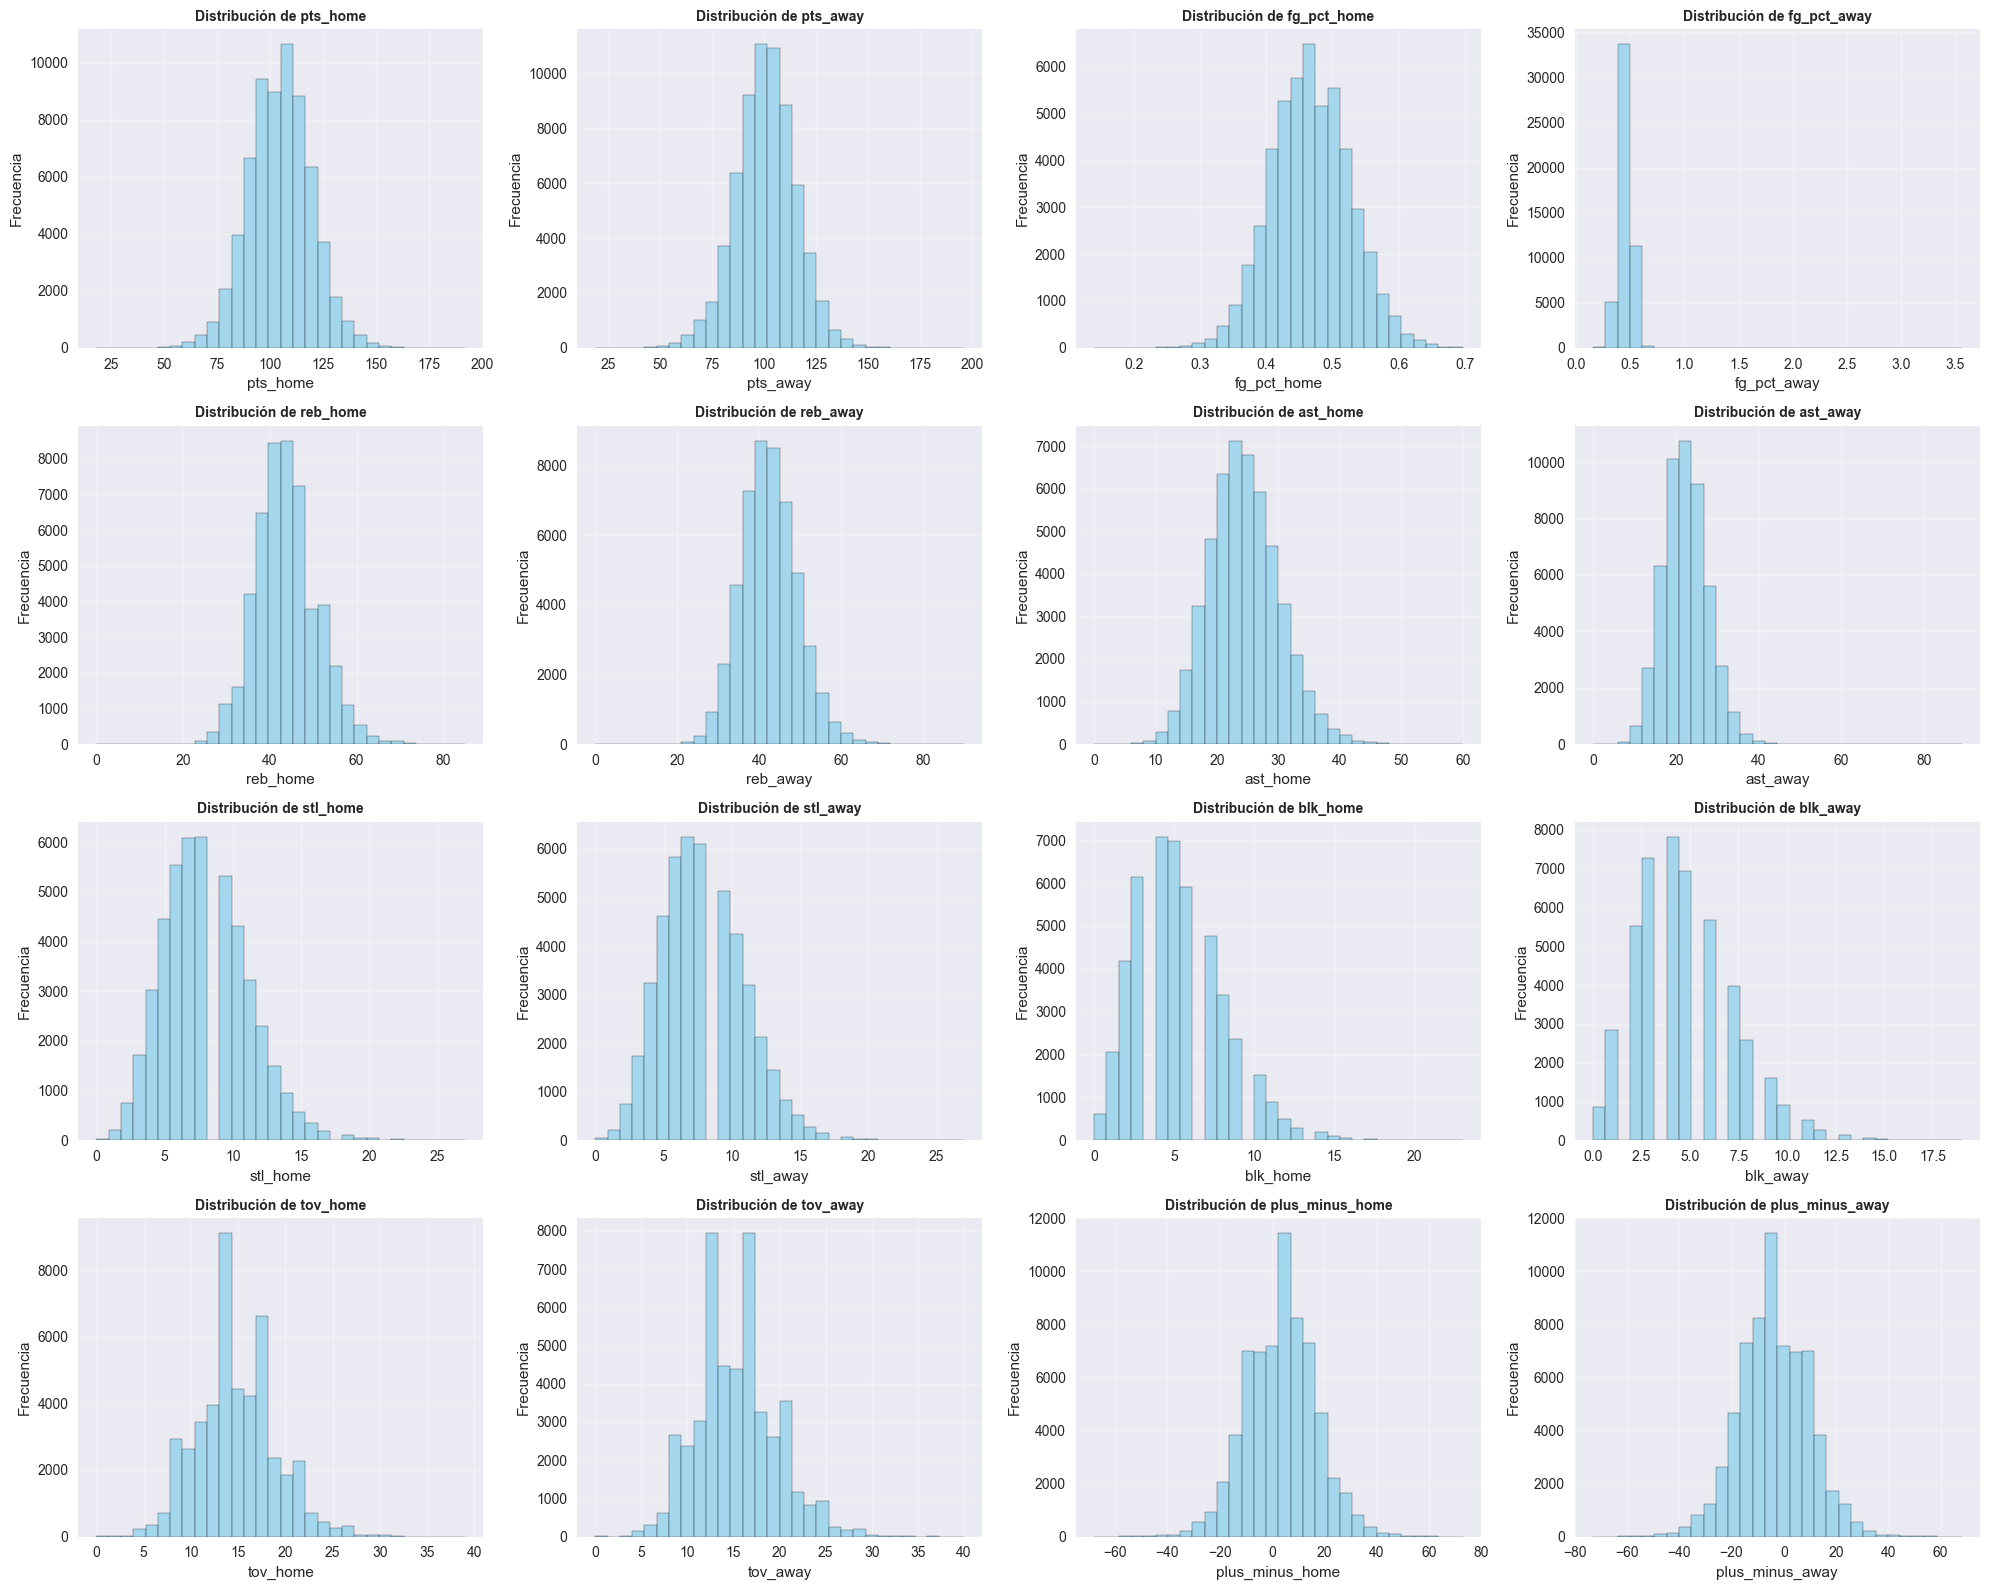


📦 2. BOXPLOTS - Detección de Outliers


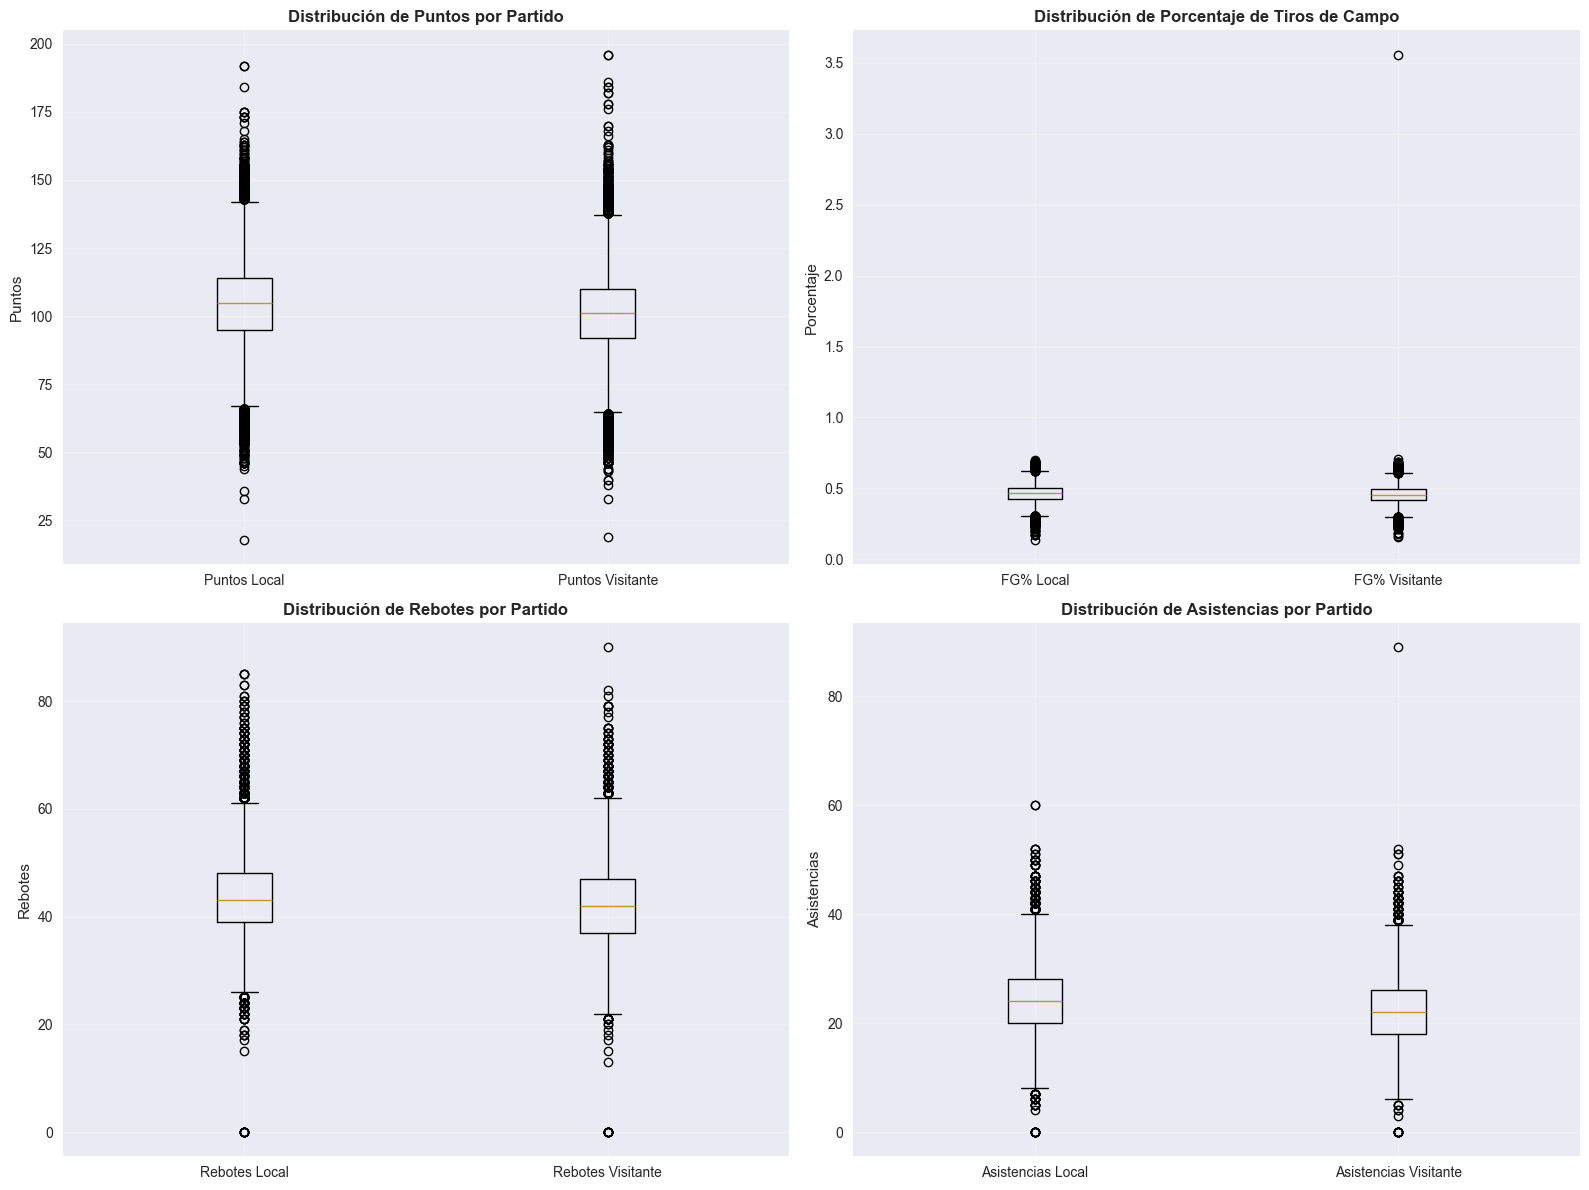

✅ Histogramas y Boxplots creados exitosamente


In [5]:
# 📊 Visualizaciones: Distribuciones y Patrones
print("📊 CREANDO VISUALIZACIONES AVANZADAS")
print("=" * 50)

# Seleccionar variables clave para visualización
key_variables = [
    'pts_home', 'pts_away', 'fg_pct_home', 'fg_pct_away', 
    'reb_home', 'reb_away', 'ast_home', 'ast_away',
    'stl_home', 'stl_away', 'blk_home', 'blk_away',
    'tov_home', 'tov_away', 'plus_minus_home', 'plus_minus_away'
]

# Filtrar variables que existen en el dataset
available_key_vars = [var for var in key_variables if var in games_df.columns]

print(f"🎯 Variables seleccionadas para visualización: {len(available_key_vars)}")

# 1. HISTOGRAMAS - Distribuciones de variables clave
print("\n📈 1. HISTOGRAMAS - Distribuciones de Variables Clave")
fig, axes = plt.subplots(4, 4, figsize=(20, 16))
axes = axes.ravel()

for i, var in enumerate(available_key_vars[:16]):  # Limitar a 16 para la cuadrícula
    if i < len(available_key_vars):
        axes[i].hist(games_df[var].dropna(), bins=30, alpha=0.7, color='skyblue', edgecolor='black')
        axes[i].set_title(f'Distribución de {var}', fontweight='bold', fontsize=10)
        axes[i].set_xlabel(var)
        axes[i].set_ylabel('Frecuencia')
        axes[i].grid(True, alpha=0.3)
    else:
        axes[i].set_visible(False)

plt.tight_layout()
plt.show()

# 2. BOXPLOTS - Detección de Outliers
print("\n📦 2. BOXPLOTS - Detección de Outliers")
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Boxplots para puntos
axes[0, 0].boxplot([games_df['pts_home'].dropna(), games_df['pts_away'].dropna()], 
                   labels=['Puntos Local', 'Puntos Visitante'])
axes[0, 0].set_title('Distribución de Puntos por Partido', fontweight='bold')
axes[0, 0].set_ylabel('Puntos')
axes[0, 0].grid(True, alpha=0.3)

# Boxplots para porcentajes de tiro
axes[0, 1].boxplot([games_df['fg_pct_home'].dropna(), games_df['fg_pct_away'].dropna()], 
                   labels=['FG% Local', 'FG% Visitante'])
axes[0, 1].set_title('Distribución de Porcentaje de Tiros de Campo', fontweight='bold')
axes[0, 1].set_ylabel('Porcentaje')
axes[0, 1].grid(True, alpha=0.3)

# Boxplots para rebotes
axes[1, 0].boxplot([games_df['reb_home'].dropna(), games_df['reb_away'].dropna()], 
                   labels=['Rebotes Local', 'Rebotes Visitante'])
axes[1, 0].set_title('Distribución de Rebotes por Partido', fontweight='bold')
axes[1, 0].set_ylabel('Rebotes')
axes[1, 0].grid(True, alpha=0.3)

# Boxplots para asistencias
axes[1, 1].boxplot([games_df['ast_home'].dropna(), games_df['ast_away'].dropna()], 
                   labels=['Asistencias Local', 'Asistencias Visitante'])
axes[1, 1].set_title('Distribución de Asistencias por Partido', fontweight='bold')
axes[1, 1].set_ylabel('Asistencias')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Histogramas y Boxplots creados exitosamente")


🔗 ANÁLISIS DE CORRELACIONES Y RELACIONES

🔗 3. MATRIZ DE CORRELACIÓN - Variables Numéricas


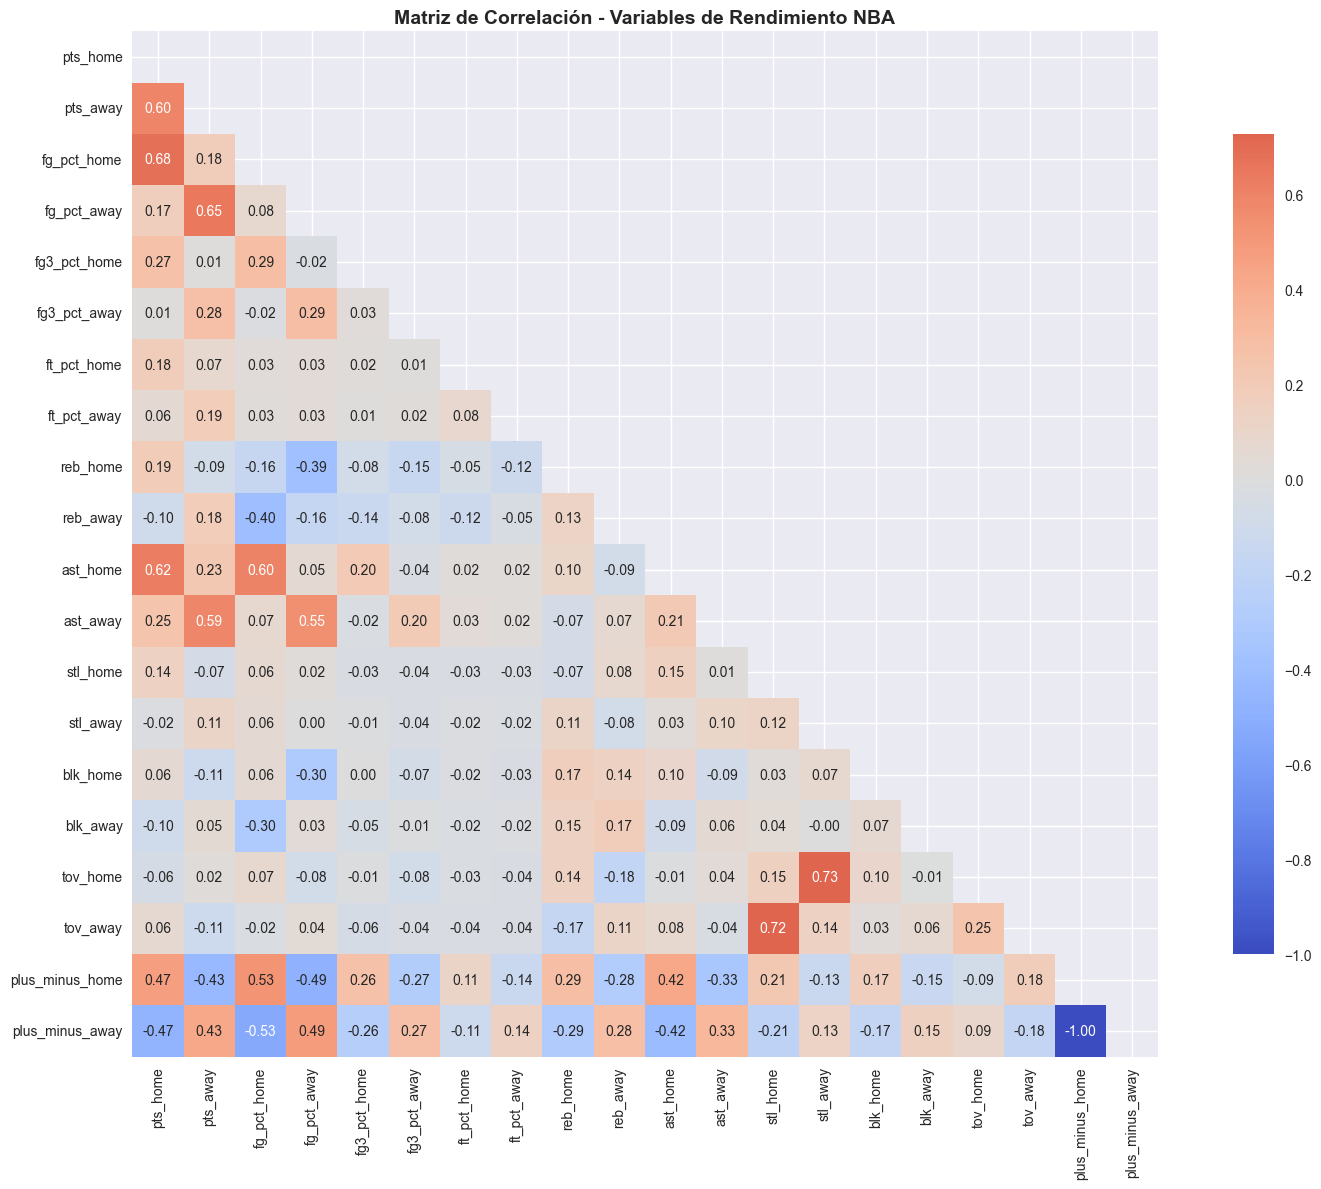


📈 4. SCATTER PLOTS - Relaciones entre Variables Clave


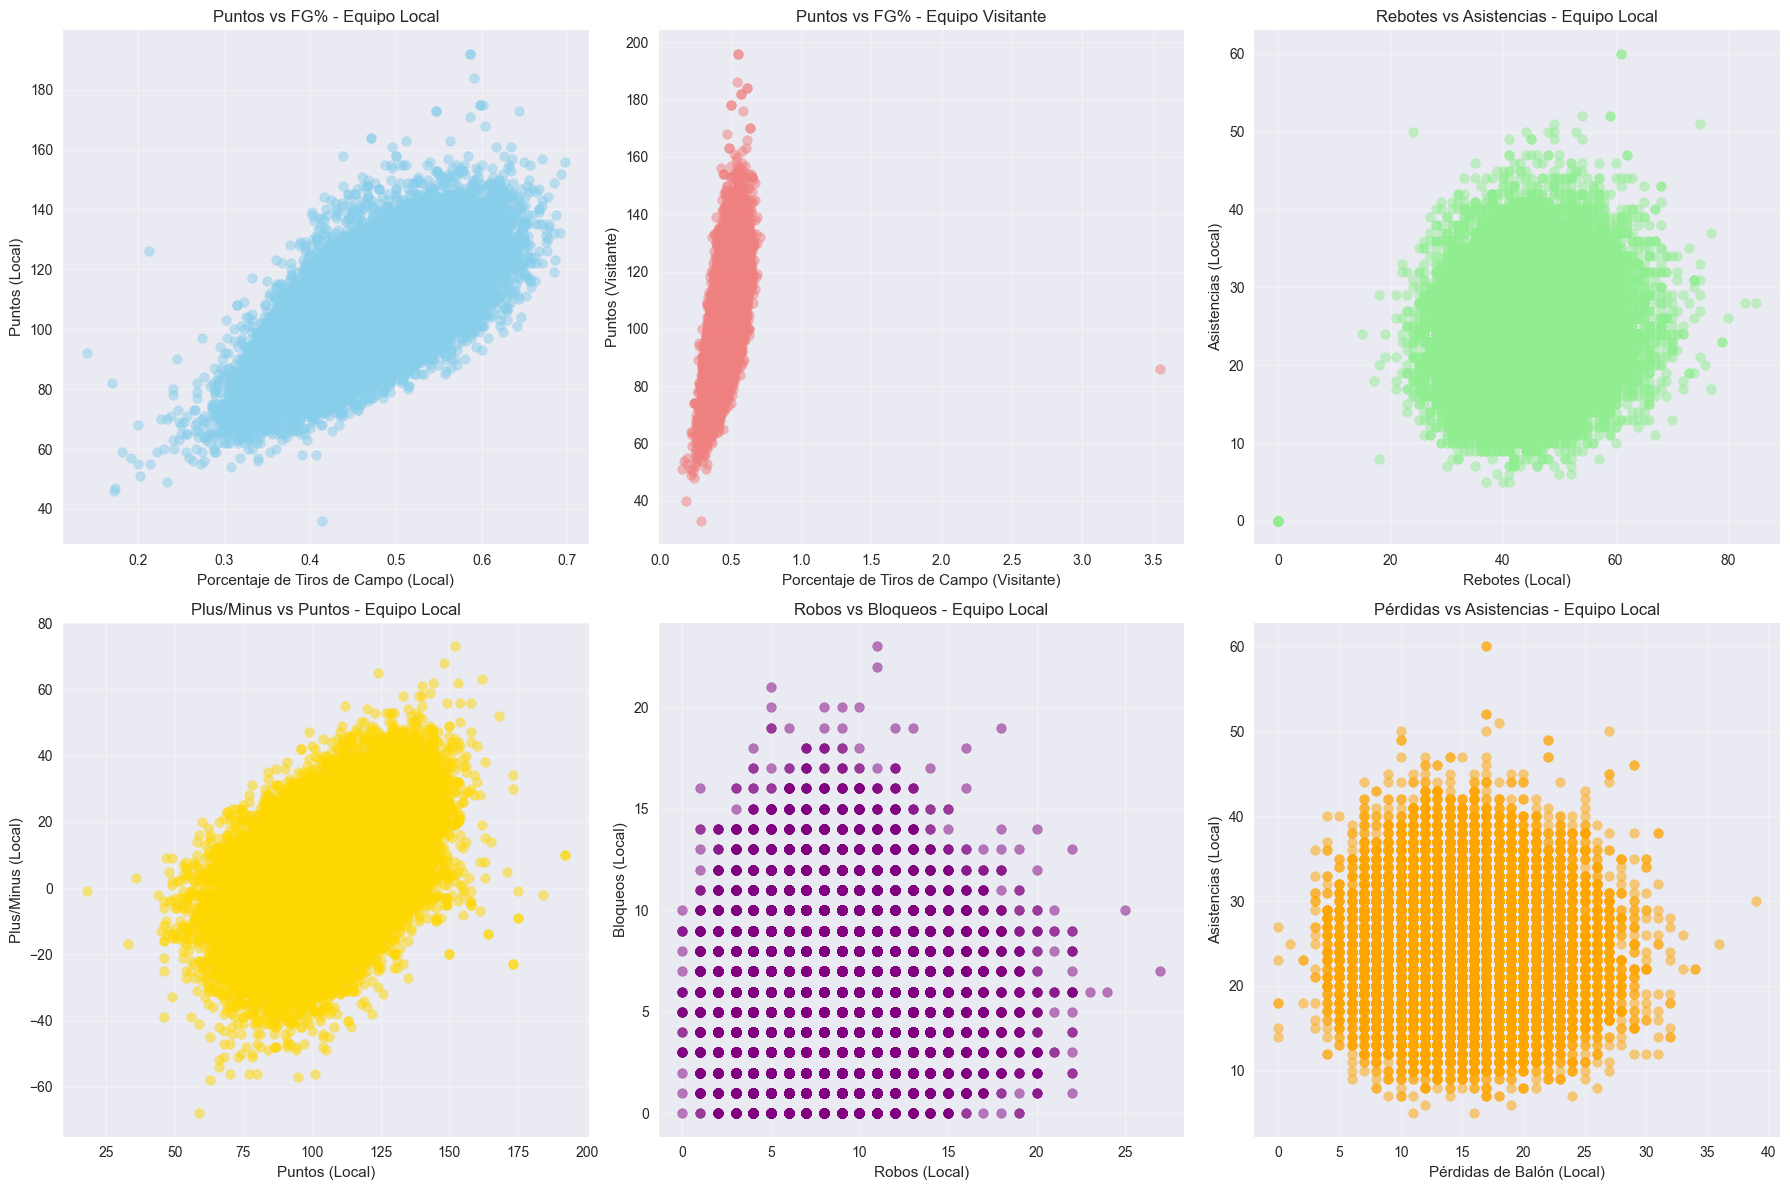

✅ Análisis de correlaciones completado


In [6]:
# 📊 Análisis de Correlaciones y Relaciones
print("🔗 ANÁLISIS DE CORRELACIONES Y RELACIONES")
print("=" * 50)

# 3. MATRIZ DE CORRELACIÓN
print("\n🔗 3. MATRIZ DE CORRELACIÓN - Variables Numéricas")

# Seleccionar variables numéricas para correlación
correlation_vars = [
    'pts_home', 'pts_away', 'fg_pct_home', 'fg_pct_away', 'fg3_pct_home', 'fg3_pct_away',
    'ft_pct_home', 'ft_pct_away', 'reb_home', 'reb_away', 'ast_home', 'ast_away',
    'stl_home', 'stl_away', 'blk_home', 'blk_away', 'tov_home', 'tov_away',
    'plus_minus_home', 'plus_minus_away'
]

# Filtrar variables disponibles
available_corr_vars = [var for var in correlation_vars if var in games_df.columns]
correlation_data = games_df[available_corr_vars].copy()

# Calcular matriz de correlación
correlation_matrix = correlation_data.corr()

# Crear heatmap de correlación
plt.figure(figsize=(16, 12))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True, 
            cmap='coolwarm', 
            center=0,
            square=True,
            fmt='.2f',
            cbar_kws={"shrink": .8})
plt.title('Matriz de Correlación - Variables de Rendimiento NBA', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# 4. SCATTER PLOTS - Relaciones entre variables clave
print("\n📈 4. SCATTER PLOTS - Relaciones entre Variables Clave")

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Puntos vs Porcentaje de tiro (Local)
axes[0, 0].scatter(games_df['fg_pct_home'], games_df['pts_home'], alpha=0.5, color='skyblue')
axes[0, 0].set_xlabel('Porcentaje de Tiros de Campo (Local)')
axes[0, 0].set_ylabel('Puntos (Local)')
axes[0, 0].set_title('Puntos vs FG% - Equipo Local')
axes[0, 0].grid(True, alpha=0.3)

# Puntos vs Porcentaje de tiro (Visitante)
axes[0, 1].scatter(games_df['fg_pct_away'], games_df['pts_away'], alpha=0.5, color='lightcoral')
axes[0, 1].set_xlabel('Porcentaje de Tiros de Campo (Visitante)')
axes[0, 1].set_ylabel('Puntos (Visitante)')
axes[0, 1].set_title('Puntos vs FG% - Equipo Visitante')
axes[0, 1].grid(True, alpha=0.3)

# Rebotes vs Asistencias (Local)
axes[0, 2].scatter(games_df['reb_home'], games_df['ast_home'], alpha=0.5, color='lightgreen')
axes[0, 2].set_xlabel('Rebotes (Local)')
axes[0, 2].set_ylabel('Asistencias (Local)')
axes[0, 2].set_title('Rebotes vs Asistencias - Equipo Local')
axes[0, 2].grid(True, alpha=0.3)

# Plus/Minus vs Puntos (Local)
axes[1, 0].scatter(games_df['pts_home'], games_df['plus_minus_home'], alpha=0.5, color='gold')
axes[1, 0].set_xlabel('Puntos (Local)')
axes[1, 0].set_ylabel('Plus/Minus (Local)')
axes[1, 0].set_title('Plus/Minus vs Puntos - Equipo Local')
axes[1, 0].grid(True, alpha=0.3)

# Robos vs Bloqueos (Local)
axes[1, 1].scatter(games_df['stl_home'], games_df['blk_home'], alpha=0.5, color='purple')
axes[1, 1].set_xlabel('Robos (Local)')
axes[1, 1].set_ylabel('Bloqueos (Local)')
axes[1, 1].set_title('Robos vs Bloqueos - Equipo Local')
axes[1, 1].grid(True, alpha=0.3)

# Pérdidas vs Asistencias (Local)
axes[1, 2].scatter(games_df['tov_home'], games_df['ast_home'], alpha=0.5, color='orange')
axes[1, 2].set_xlabel('Pérdidas de Balón (Local)')
axes[1, 2].set_ylabel('Asistencias (Local)')
axes[1, 2].set_title('Pérdidas vs Asistencias - Equipo Local')
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Análisis de correlaciones completado")


In [7]:
# 🧠 Análisis de Insights Clave
print("🧠 ANÁLISIS DE INSIGHTS CLAVE")
print("=" * 40)

# 1. ANÁLISIS DE LA VARIABLE OBJETIVO
print("🎯 1. ANÁLISIS DE LA VARIABLE OBJETIVO (wl_home)")
print("-" * 50)

# Distribución de victorias/derrotas
win_loss_dist = games_df['wl_home'].value_counts()
win_percentage = (games_df['wl_home'] == 'W').mean()

print(f"📊 Distribución de Resultados:")
print(f"• Victorias locales: {win_loss_dist.get('W', 0):,} ({win_percentage:.1%})")
print(f"• Derrotas locales: {win_loss_dist.get('L', 0):,} ({1-win_percentage:.1%})")
print(f"• Total de partidos: {len(games_df):,}")

# Análisis por temporada
print(f"\n📅 Análisis por Temporada:")
season_analysis = games_df.groupby('season_id')['wl_home'].apply(lambda x: (x == 'W').mean()).reset_index()
season_analysis.columns = ['Temporada', 'Porcentaje_Victoria_Local']
print(f"• Promedio de victorias locales: {season_analysis['Porcentaje_Victoria_Local'].mean():.1%}")
print(f"• Rango: {season_analysis['Porcentaje_Victoria_Local'].min():.1%} - {season_analysis['Porcentaje_Victoria_Local'].max():.1%}")

# 2. DETECCIÓN DE OUTLIERS
print(f"\n🔍 2. DETECCIÓN DE OUTLIERS")
print("-" * 30)

def detect_outliers_iqr(data, column):
    """Detectar outliers usando el método IQR"""
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Analizar outliers en variables clave
outlier_vars = ['pts_home', 'pts_away', 'fg_pct_home', 'fg_pct_away', 'reb_home', 'reb_away']
outlier_summary = []

for var in outlier_vars:
    if var in games_df.columns:
        outliers, lower, upper = detect_outliers_iqr(games_df, var)
        outlier_count = len(outliers)
        outlier_percentage = (outlier_count / len(games_df)) * 100
        outlier_summary.append({
            'Variable': var,
            'Outliers': outlier_count,
            'Porcentaje': f"{outlier_percentage:.2f}%",
            'Límite_Inferior': f"{lower:.2f}",
            'Límite_Superior': f"{upper:.2f}"
        })

outlier_df = pd.DataFrame(outlier_summary)
print("📊 Resumen de Outliers (Método IQR):")
display(outlier_df)

# 3. ANÁLISIS DE SESGOS TEMPORALES
print(f"\n📅 3. ANÁLISIS DE SESGOS TEMPORALES")
print("-" * 40)

# Evolución de estadísticas a lo largo del tiempo
recent_seasons = games_df['season_id'].tail(10).unique()
print(f"📈 Análisis de las últimas 10 temporadas:")
print(f"• Temporadas: {sorted(recent_seasons)}")

# Comparar estadísticas entre temporadas tempranas y recientes
early_seasons = games_df[games_df['season_id'] <= 20000]  # Años 1946-2000
recent_seasons_data = games_df[games_df['season_id'] > 20000]  # Años 2000+

if len(early_seasons) > 0 and len(recent_seasons_data) > 0:
    print(f"\n📊 Comparación Temporadas Tempranas vs Recientes:")
    comparison_stats = pd.DataFrame({
        'Período': ['Temprano (1946-2000)', 'Reciente (2000+)'],
        'Puntos_Promedio_Local': [early_seasons['pts_home'].mean(), recent_seasons_data['pts_home'].mean()],
        'FG%_Promedio_Local': [early_seasons['fg_pct_home'].mean(), recent_seasons_data['fg_pct_home'].mean()],
        'Rebotes_Promedio_Local': [early_seasons['reb_home'].mean(), recent_seasons_data['reb_home'].mean()]
    })
    display(comparison_stats)

# 4. ANÁLISIS DE EQUILIBRIO DE CLASES
print(f"\n⚖️ 4. ANÁLISIS DE EQUILIBRIO DE CLASES")
print("-" * 40)

# Verificar si hay desequilibrio significativo
class_balance = (games_df['wl_home'] == 'W').mean()
imbalance_threshold = 0.1  # 10% de diferencia se considera desequilibrio

if abs(class_balance - 0.5) > imbalance_threshold:
    print(f"⚠️  DESEQUILIBRIO DETECTADO:")
    print(f"• Porcentaje de victorias locales: {class_balance:.1%}")
    print(f"• Diferencia del equilibrio: {abs(class_balance - 0.5):.1%}")
    print(f"• Recomendación: Considerar técnicas de balanceo de clases")
else:
    print(f"✅ CLASES EQUILIBRADAS:")
    print(f"• Porcentaje de victorias locales: {class_balance:.1%}")
    print(f"• Diferencia del equilibrio: {abs(class_balance - 0.5):.1%}")

print("\n✅ Análisis de insights completado")


🧠 ANÁLISIS DE INSIGHTS CLAVE
🎯 1. ANÁLISIS DE LA VARIABLE OBJETIVO (wl_home)
--------------------------------------------------
📊 Distribución de Resultados:
• Victorias locales: 40,649 (61.9%)
• Derrotas locales: 25,047 (38.1%)
• Total de partidos: 65,698

📅 Análisis por Temporada:
• Promedio de victorias locales: 58.8%
• Rango: 0.0% - 100.0%

🔍 2. DETECCIÓN DE OUTLIERS
------------------------------
📊 Resumen de Outliers (Método IQR):


,Variable,Outliers,Porcentaje,Límite_Inferior,Límite_Superior
0,pts_home,849,1.29%,66.50,142.50
1,pts_away,943,1.44%,65.00,137.00
2,fg_pct_home,428,0.65%,0.31,0.62
3,fg_pct_away,386,0.59%,0.30,0.61
4,reb_home,694,1.06%,25.50,61.50
5,reb_away,244,0.37%,22.00,62.00



📅 3. ANÁLISIS DE SESGOS TEMPORALES
----------------------------------------
📈 Análisis de las últimas 10 temporadas:
• Temporadas: [np.int64(32022), np.int64(42022)]

📊 Comparación Temporadas Tempranas vs Recientes:


,Período,Puntos_Promedio_Local,FG%_Promedio_Local,Rebotes_Promedio_Local
0,Temprano (1946-2000),100.382161,0.447292,43.516276
1,Reciente (2000+),104.720567,0.467953,43.769207



⚖️ 4. ANÁLISIS DE EQUILIBRIO DE CLASES
----------------------------------------
⚠️  DESEQUILIBRIO DETECTADO:
• Porcentaje de victorias locales: 61.9%
• Diferencia del equilibrio: 11.9%
• Recomendación: Considerar técnicas de balanceo de clases

✅ Análisis de insights completado
